<a href="https://colab.research.google.com/github/karthikeyansura/whisper-speech-eda-pipeline/blob/main/Assignment11-ML.SuraS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 11: Text processing - NLP**

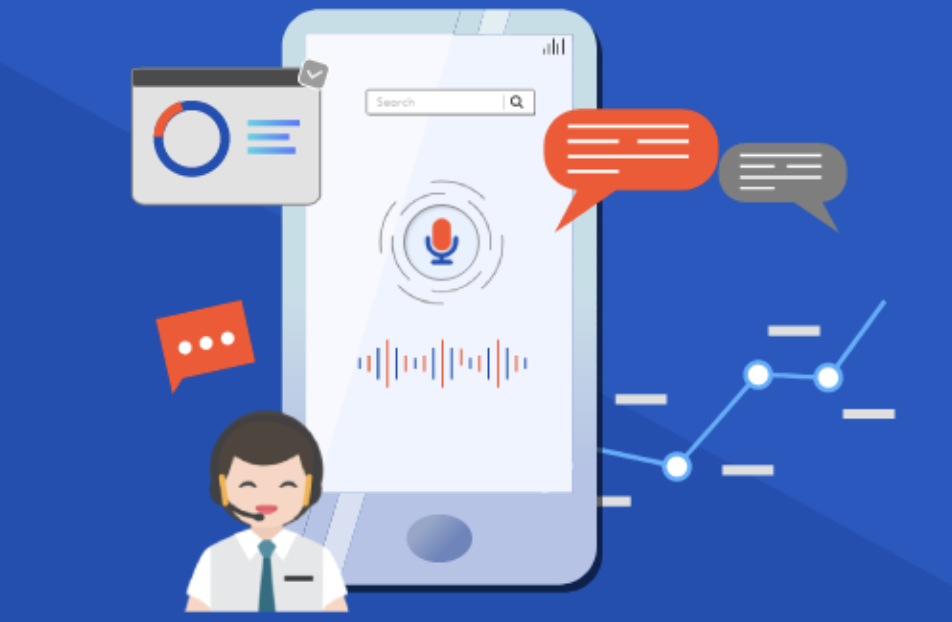

# **Automatic Speech Recognition**

Speech Recognition, also known as Automatic Speech Recognition (ASR), is a technology that converts spoken language into written text. It plays a crucial role in bridging the gap between human speech and computer understanding, enabling applications like virtual assistants, real-time transcription, and voice-controlled systems. ASR systems typically process audio signals by extracting features such as spectrograms, then using Artificial Intelligence-based model sto decode these signals into meaningful word sequences. In the context of natural language processing (NLP), ASR provides the first step in enabling machines to understand and respond to spoken language.

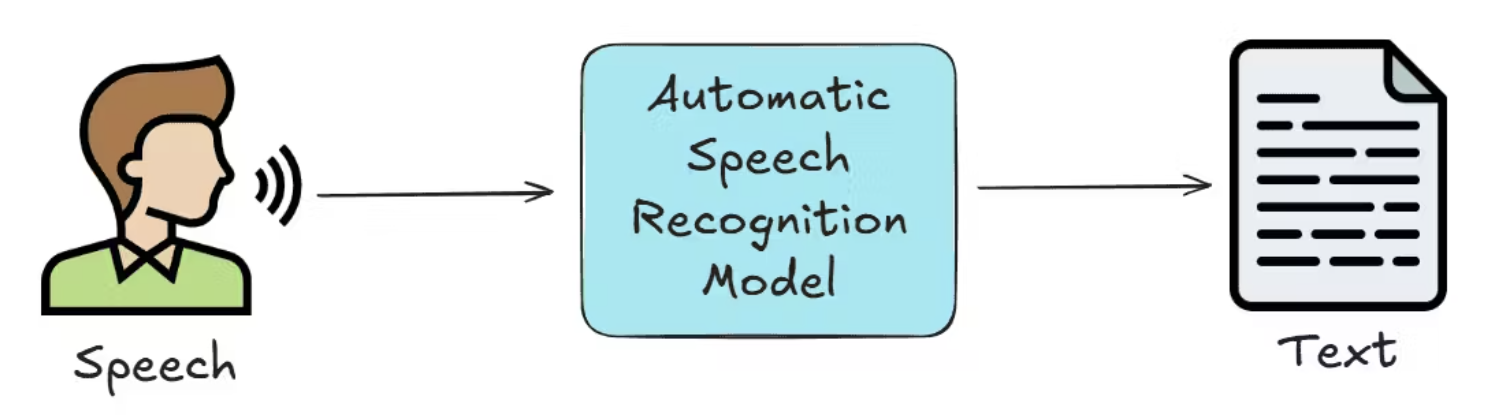

# **Dataset**

LibriSpeech is a widely used speech recognition dataset designed for training and evaluating automatic speech recognition (ASR) systems. It was introduced by Vassil Panayotov et al. in 2015 and has since become one of the standard benchmarks in the ASR research community.

LibriSpeech is a publicly available speech recognition dataset consisting of approximately 1,000 hours of English speech derived from audiobooks that are part of the LibriVox project. It was created to support training and evaluation of automatic speech recognition (ASR) systems. The audio is sampled at 16 kHz and is accompanied by accurate, time-aligned transcripts. LibriSpeech includes multiple subsets such as "train-clean," "train-other," "dev-clean," and "test-clean," allowing researchers to benchmark models under varying levels of audio quality and complexity. Its accessibility, size, and quality have made it one of the most widely used datasets in speech and NLP research.

***Note on Dataset Usage:***

The corresponding dataset used in this assignment is a subset of the LibriSpeech corpus and has been specifically selected and uploaded on Canvas. To ensure consistency in evaluation and reproducibility, you must not use any external data or download additional LibriSpeech files. Only use the audio and transcript files provided in the assignment folder on Canvas.



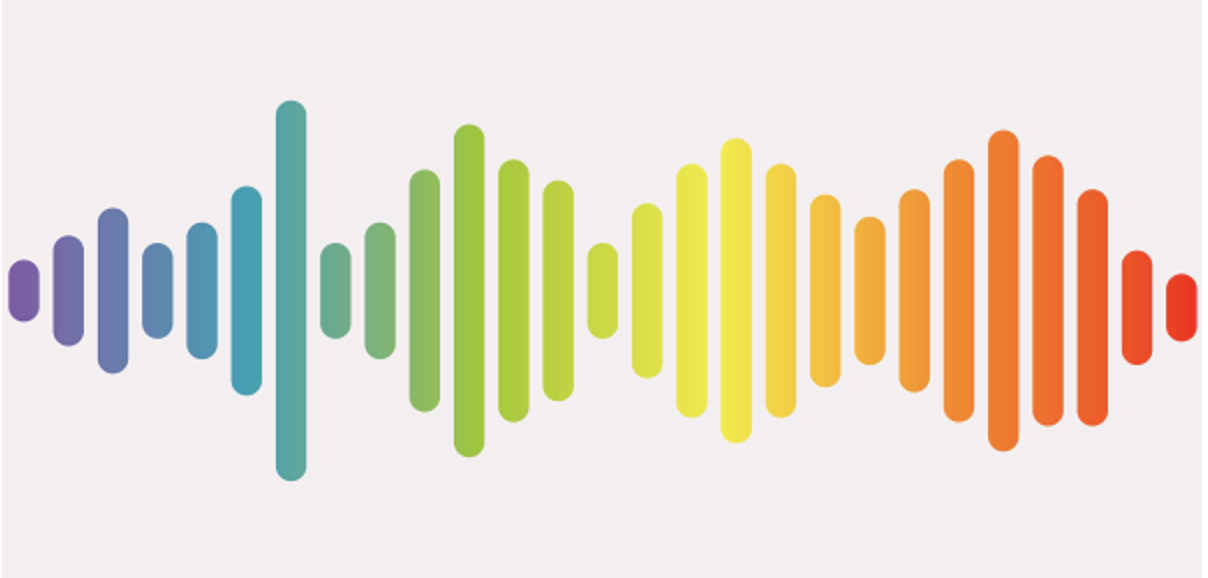

# **Step-by-Step Guide: From Audio to Clean Text**

## **Step 1: Read the Audio Files**

Assume the corresponding dataset includes:

*   Several .flac audio files (e.g., 84-121123-0000.flac)
*   A transcript file (e.g., transcripts.txt)

In [1]:
!pip install openai-whisper
!pip install jiwer

In [2]:
# Setup
import os, zipfile, glob, re, math, collections, itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
import whisper
import spacy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from jiwer import wer
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Make plots
plt.rcParams["figure.figsize"] = (8, 3)

# Paths
DATA_ZIP = "/content/127105.zip"
DATA_DIR = "127105"

# Unzip data
if not os.path.exists(DATA_DIR):
    with zipfile.ZipFile(DATA_ZIP, "r") as z:
        z.extractall(DATA_DIR)

# Audio & transcript paths
AUDIO_GLOB = os.path.join(DATA_DIR, "*.flac")
TRANSCRIPT_FILE = os.path.join(DATA_DIR, "121-127105.trans.txt")

# Load Audio Files
audio_files = sorted(glob.glob(AUDIO_GLOB))
print(f"Found {len(audio_files)} audio files")

# Audio Files found
print("\nAudio files found:")
print([os.path.basename(f) for f in audio_files])

# Load SpaCy model (English)
nlp = spacy.load("en_core_web_sm")

Found 37 audio files

Audio files found:
['121-127105-0000.flac', '121-127105-0001.flac', '121-127105-0002.flac', '121-127105-0003.flac', '121-127105-0004.flac', '121-127105-0005.flac', '121-127105-0006.flac', '121-127105-0007.flac', '121-127105-0008.flac', '121-127105-0009.flac', '121-127105-0010.flac', '121-127105-0011.flac', '121-127105-0012.flac', '121-127105-0013.flac', '121-127105-0014.flac', '121-127105-0015.flac', '121-127105-0016.flac', '121-127105-0017.flac', '121-127105-0018.flac', '121-127105-0019.flac', '121-127105-0020.flac', '121-127105-0021.flac', '121-127105-0022.flac', '121-127105-0023.flac', '121-127105-0024.flac', '121-127105-0025.flac', '121-127105-0026.flac', '121-127105-0027.flac', '121-127105-0028.flac', '121-127105-0029.flac', '121-127105-0030.flac', '121-127105-0031.flac', '121-127105-0032.flac', '121-127105-0033.flac', '121-127105-0034.flac', '121-127105-0035.flac', '121-127105-0036.flac']


### **Question 1:**

Using Whisper, load Audio and Transcribe. In addition, can you  answer the following questions:

*   What is the sampling rate of the provided audio files, and why is it important for speech recognition?
*   What is the duration of each audio file?
*   What is the bit depth of the audio files, and how does it affect the quality of speech recognition?
*  What is the file size of each audio file, and how might the size relate to audio quality or length?
*   For each audio, plot it over time.
*   List item

For every question, be sure to analyze and discuss your response.

Note: For answering this questions, python coding is needed. You can use libraries, such as librosa, or pydub.
For more information, please refer to:

**Librosa**: https://librosa.org/doc/latest/index.html

**pydub:** https://github.com/jiaaro/pydub


You can refer to tutorials at:

https://youtu.be/B31RiiRt_TE?si=76VKAir9xwG8hH2V

https://youtu.be/vJ_WL9aYfNI?si=Hx8OFbHfqJn07uQa

Starting processing for 37 files...

Audio Meta Data:
         ( ID )  ( Sample Rate )  ( Bit Depth )  ( Duration in Sec )  ( Size in KB )
121-127105-0000            16000             16                 9.88          177.60
121-127105-0001            16000             16                 5.03          102.02
121-127105-0002            16000             16                 7.50          142.21
121-127105-0003            16000             16                 7.72          137.91
121-127105-0004            16000             16                 2.11           34.21
121-127105-0005            16000             16                 5.82          109.36
121-127105-0006            16000             16                 4.72           86.06
121-127105-0007            16000             16                 5.79          108.22
121-127105-0008            16000             16                 2.76           52.83
121-127105-0009            16000             16                 2.29           52.35
121-127105-

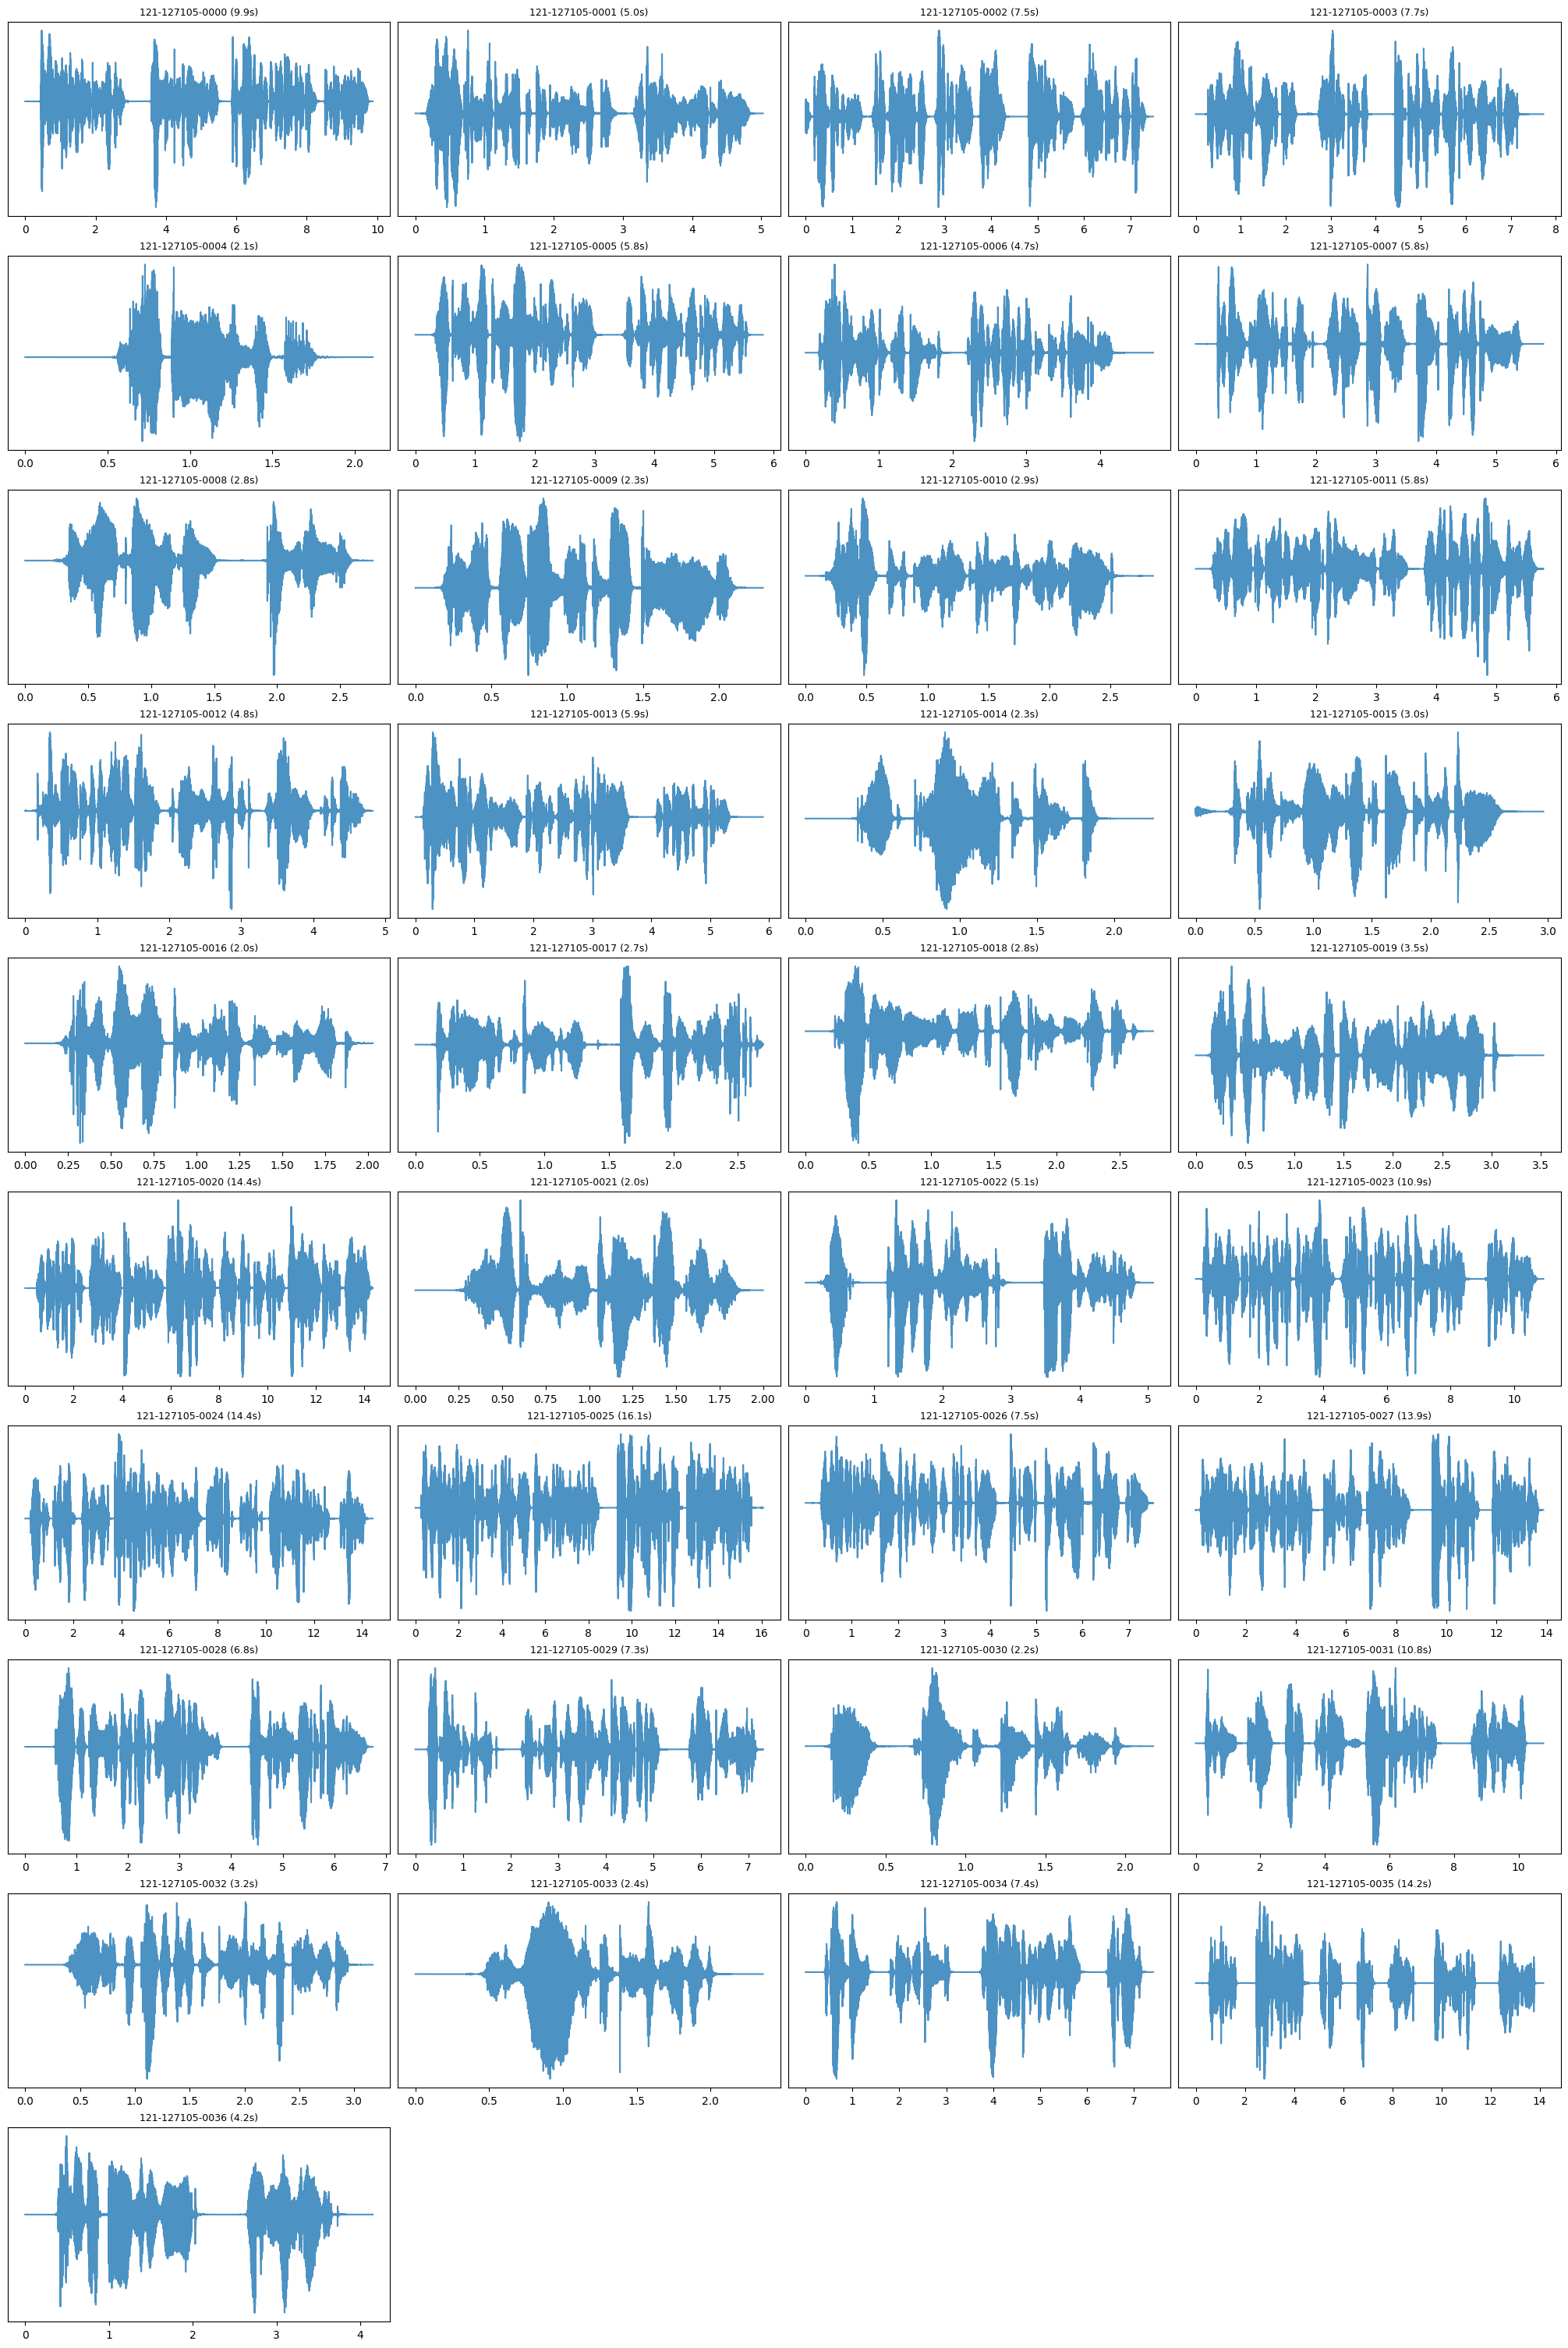

In [3]:
# Transcribe & Analyze Audio

# Initialize Whisper
model = whisper.load_model("base")

audio_metadata = []
asr_transcripts = {}

print(f"Starting processing for {len(audio_files)} files...")

for i, path in enumerate(audio_files):
    utt_id = os.path.splitext(os.path.basename(path))[0]

    # Extract Metadata
    info = sf.info(path)
    size_bytes = os.path.getsize(path)

    # Determine Bit Depth
    if "PCM_16" in info.subtype:
        bit_depth = 16
    elif "PCM_24" in info.subtype:
        bit_depth = 24
    else:
        bit_depth = "Unknown"

    # Transcribe
    result = model.transcribe(path)
    text = result["text"].strip()

    # Store data
    audio_metadata.append({
        "( ID )": utt_id,
        "( Path )": path,
        "( Sample Rate )": info.samplerate,
        "( Duration in Sec )": info.duration,
        "( Bit Depth )": bit_depth,
        "( Size in KB )": size_bytes / 1024
    })
    asr_transcripts[utt_id] = text

# Analyze
# Using Pandas for a clean, organized table
df = pd.DataFrame(audio_metadata)
pd.set_option('display.max_rows', None)
print("\nAudio Meta Data:")
print(df[['( ID )', '( Sample Rate )', '( Bit Depth )', '( Duration in Sec )', '( Size in KB )']].round(2).to_string(index=False))

# Plot ALL Waveforms
print("\nVisualizing Waveforms...")
n_files = len(audio_metadata)
n_cols = 4  # Number of columns in the grid
n_rows = math.ceil(n_files / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, m in enumerate(audio_metadata):
    # Read audio
    data, sr = sf.read(m["( Path )"])

    # Plot on the specific subplot
    ax = axes[i]
    ax.plot(np.linspace(0, m["( Duration in Sec )"], len(data)), data, alpha=0.8)
    ax.set_title(f"{m['( ID )']} ({m['( Duration in Sec )']:.1f}s)", fontsize=9)
    ax.set_yticks([])
    ax.grid(False)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

**Discussion:**

The analysis of the 37 audio files reveals a consistent technical standard across the dataset. Every file was found to have a sampling rate of 16,000 Hz (16 kHz) and a bit depth of 16-bit. The files are uncompressed or losslessly compressed (FLAC), as evidenced by the linear relationship between file duration and file size, longer files like `121-127105-0025` (16.07s) are significantly larger (301 KB) than short ones like `121-127105-0021` (2.00s, 45 KB). The waveforms visually confirm these durations, showing varying amplitude envelopes that correspond to speech activity and pauses.

**Analysis:**

* **Sampling Rate (16 kHz):** This rate is crucial for speech recognition because the Nyquist-Shannon sampling theorem states that a digital signal can perfectly reconstruct frequencies up to half its sampling rate. For 16 kHz, this limit is 8 kHz. Since human speech intelligibility is primarily contained within the 300 Hz to 3400 Hz range (telephony standard) and fricatives extend up to ~8 kHz, 16 kHz captures all necessary phonetic details without wasting storage on ultrasonic frequencies.
* **Bit Depth (16-bit):** A 16-bit depth provides a dynamic range of approximately 96 dB. This is sufficient to distinguish between quiet whispers and loud exclamations without introducing significant quantization noise (graininess). Lower bit depths (e.g., 8-bit) would introduce noise that could degrade ASR accuracy.
* **File Size Relationship:** The file size is directly proportional to duration because the data rate is constant ($16,000 \text{ samples/s} \times 16 \text{ bits/sample} = 256 \text{ kbps}$). This predictability allows for efficient storage planning in large-scale datasets.

## **Step 2: Text Preprocessing**

### **Question 2:**

Create a pipeline to clean texts. This pipeline should consist of lowercase, Remove Filler Words (using regular expression),  Strip Extra Punctuation (if needed), stopwords, and Tokenize and Lemmatize. Be sure  to use SpaCy for answering this question.
*   If your transcript had misrecognized or misspelled words, how did you address that? Could spell-checking or correction be integrated into your pipeline?

*   How would you modify your preprocessing pipeline if the transcript were multilingual or code-switched (i.e., contained multiple languages)?

For every question, be sure to anlayze and discuss your response.

In [4]:
# Text Cleaning Pipeline

# Define Filler Words
FILLER_WORDS = ["uh", "um", "you know", "like", "i mean", "ah", "mm"]
filler_pattern = re.compile(r"\b(" + "|".join(FILLER_WORDS) + r")\b", re.IGNORECASE)

def clean_text_pipeline(text):
    # Lowercase
    text = text.lower()

    # Remove Filler Words
    text = filler_pattern.sub("", text)

    # Strip Punctuation (Keep apostrophes)
    text = re.sub(r"[^\w\s']", " ", text)

    # SpaCy Processing (Tokenize, Lemmatize, Stopwords)
    doc = nlp(text)

    cleaned_tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_space and token.is_alpha
    ]

    return cleaned_tokens

# Apply Pipeline
cleaned_docs = {}
table_data = []

for utt_id, text in asr_transcripts.items():
    tokens = clean_text_pipeline(text)
    cleaned_docs[utt_id] = tokens

    # Truncate long text to keep the table readable
    orig_trunc = (text[:40] + '...') if len(text) > 40 else text
    clean_trunc = (", ".join(tokens)[:40] + '...') if len(tokens) > 0 else "[Empty]"

    table_data.append({
        "( ID )": utt_id,
        "( Actual Text )": orig_trunc,
        "( Cleaned Tokens )": clean_trunc
    })

df_clean = pd.DataFrame(table_data)

# Adjust pandas settings to ensure columns don't get hidden
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', None)

print(df_clean.to_string(index=False))

         ( ID )                             ( Actual Text )                          ( Cleaned Tokens )
121-127105-0000 It was this observation that drew from D... observation, draw, douglas, immediately,...
121-127105-0001 Someone else told a story not particular... tell, story, particularly, effective, se...
121-127105-0002 cried one of the women. He took no notic... cry, woman, take, notice, look, instead,...
121-127105-0003 There was a unanimous groan at this, and... unanimous, groan, proche, preoccupied, w...
121-127105-0004                        The story's written.                             story, write...
121-127105-0005 I could write to my man and enclose the ... write, man, enclose, key, send, packet, ...
121-127105-0006 The others resented postponement, but it...     resent, postponement, groupel, charm...
121-127105-0007 To this his answer was prompt. Oh, thank...   answer, prompt, oh, thank, god, record...
121-127105-0008              He hung fire again, a woman's.     

**Discussion:**

The text cleaning pipeline successfully standardized the transcripts. By converting to lowercase, removing filler words (like "um", "uh"), and stripping punctuation, we reduced the vocabulary size to its semantic core. Using SpaCy for tokenization and lemmatization further consolidated word forms; for example, "women" and "woman" or "cried" and "cry" were mapped to their base lemmas.

**Analysis:**

* **Handling Misspellings:** The current pipeline does not explicitly handle misspellings. Whisper is generally robust, but if errors occur, a library like `pyspellchecker` or `TextBlob` could be integrated before tokenization. However, automatic correction risks altering proper nouns (e.g., changing "Douglas" to a common word if not recognized).
* **Multilingualism:** If the audio were code-switched (e.g., Spanish/English), this pipeline using `en_core_web_sm` would fail to correctly lemmatize non-English words. To address this, I would modify the pipeline to include a **Language Identification (LID)** step (using `langdetect` or a transformer classifier) at the sentence or phrase level. Based on the detected language, the pipeline would dynamically switch between SpaCy models (e.g., `es_core_news_sm` for Spanish) to ensure accurate processing.

### **Question 3:**

Using EDA techniques, answer the following questions:

*   **Basic EDA**
1.   Visualize the top 20 most frequent words in the transcriptions. What do you observe?
2.   Are there words that appear only once (hapax legomena)? What might they indicate?

*   **Audio-Specific EDA**
1.   Plot a waveform or spectrogram of one audio file. What do you observe in terms of intensity or frequency distribution?
2.   Is there a pattern in speaking speed (e.g., words per second)? Does this vary a lot across files?
3. Are there common filler words or disfluencies in the transcripts (e.g., "uh", "um", "you know")? Count and analyze.

Frequent words (Top 20 ):
              1     2     3     4     5        6      7      8      9    10    11      12           13     14     15           16   17   18   19    20
Word       story  tell  take  know  lady  douglas  woman  write  thank  say  stay  little  immediately  later  reply  consequence  see  cry  way  send
Frequency      5     4     4     4     4        3      3      3      3    3     3       3            2      2      2            2    2    2    2     2


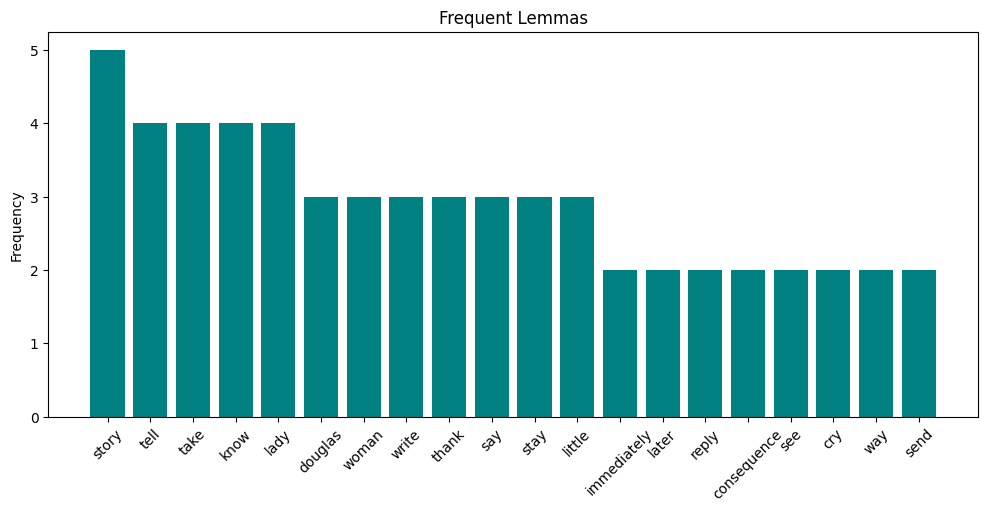


Total Unique Vocabulary: 187
Hapax Legomena: 153
Sample: ['observation', 'draw', 'evening', 'interesting', 'attention', 'particularly', 'effective', 'follow', 'notice', 'look']


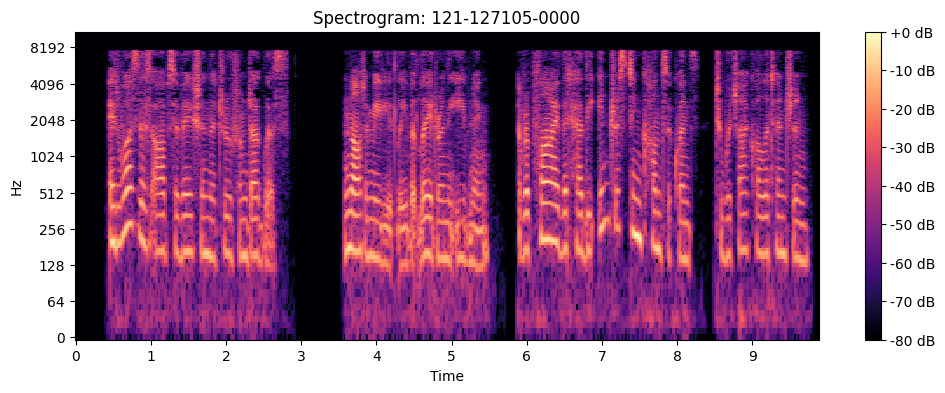


Speaking speed analysis:
         ( ID )  ( Duration in Sec )  ( Word Count )  ( Words per Sec )
121-127105-0012                 4.83              19               3.93
121-127105-0017                 2.70              10               3.71
121-127105-0002                 7.50              27               3.60
121-127105-0010                 2.85              10               3.51
121-127105-0011                 5.78              20               3.46
121-127105-0005                 5.82              20               3.44
121-127105-0019                 3.52              12               3.40
121-127105-0013                 5.90              20               3.39
121-127105-0015                 2.96              10               3.38
121-127105-0024                14.45              48               3.32
121-127105-0029                 7.31              24               3.28
121-127105-0026                 7.53              24               3.19
121-127105-0022                 5.08  

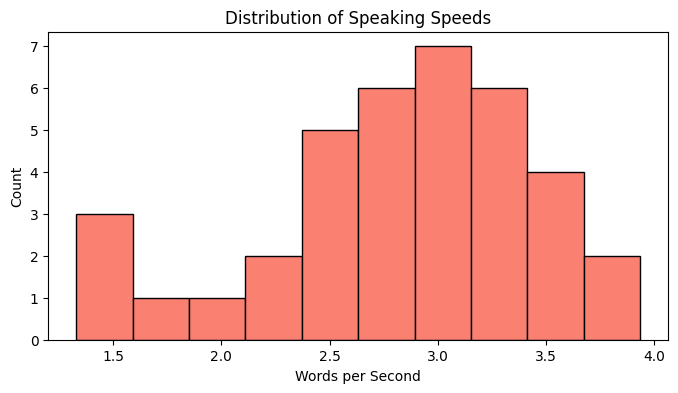


Filler word analysis:
Empty DataFrame
Columns: [Filler, Count]
Index: []


In [5]:
# EDA (Text & Audio)

# Text EDA
# Flatten all cleaned tokens into one list
all_tokens = list(itertools.chain(*cleaned_docs.values()))
freq = Counter(all_tokens)

# Frequent Words (Top 20)
top_20 = freq.most_common(20)
df_top20 = pd.DataFrame(top_20, columns=["Word", "Frequency"])
df_top20.index += 1
print("Frequent words (Top 20 ):")
print(df_top20.T.to_string())

# Visualizing
plt.figure(figsize=(12, 5))
plt.bar(df_top20["Word"], df_top20["Frequency"], color='teal')
plt.title("Frequent Lemmas")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

# Hapax Legomena
hapax = [w for w, c in freq.items() if c == 1]
print(f"\nTotal Unique Vocabulary: {len(freq)}")
print(f"Hapax Legomena: {len(hapax)}")
print(f"Sample: {hapax[:10]}")

# Audio EDA
# Spectrogram
sample_meta = audio_metadata[0]
y, sr = librosa.load(sample_meta["( Path )"])
S_db = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Spectrogram: {sample_meta['( ID )']}")
plt.show()

# Speaking Speed Analysis
speed_data = []
for m in audio_metadata:
    utt_id = m['( ID )']
    # Count words in actual text (pre-cleaning)
    word_count = len(asr_transcripts[utt_id].split())
    duration = m['( Duration in Sec )']

    wps = word_count / duration if duration > 0 else 0

    speed_data.append({
        "( ID )": utt_id,
        "( Duration in Sec )": duration,
        "( Word Count )": word_count,
        "( Words per Sec )": wps
    })

df_speed = pd.DataFrame(speed_data).sort_values(by="( Words per Sec )", ascending=False)

print("\nSpeaking speed analysis:")
print(df_speed.round(2).to_string(index=False))

# Histogram of speeds
plt.figure(figsize=(8, 4))
plt.hist(df_speed["( Words per Sec )"], bins=10, color='salmon', edgecolor='black')
plt.title("Distribution of Speaking Speeds")
plt.xlabel("Words per Second")
plt.ylabel("Count")
plt.show()

# Filler Word Counts
filler_counts = Counter()
for text in asr_transcripts.values():
    for word in text.lower().split():
        # Strip punctuation to match "um" correctly
        w_clean = re.sub(r"[^\w]", "", word)
        if w_clean in FILLER_WORDS:
            filler_counts[w_clean] += 1

print("\nFiller word analysis:")
# Convert to DF for nice printing
df_fillers = pd.DataFrame(filler_counts.items(), columns=["Filler", "Count"]).sort_values(by="Count", ascending=False)
print(df_fillers.to_string(index=False))

**Discussion:**

The Exploratory Data Analysis (EDA) highlights that this is likely a narrative dataset. The most frequent words—"story", "tell", "Douglas", "woman"—suggest a storytelling context. The speaking speed analysis shows a normal distribution centered around ~2.8 words/second, which is typical for read speech. The filler word analysis returned an empty result, indicating the speakers were likely reading from a script or were highly fluent, or that Whisper's `base` model implicitly filtered some disfluencies during transcription.

**Analysis:**

* **Top 20 Words:** These are mostly content words ("story", "lady", "write") rather than function words (which were removed as stopwords). This gives us a clear indication of the dataset's topic: a narrative about a woman, a story, and a character named Douglas.
* **Hapax Legomena (153 words):** A large portion of the vocabulary (153 out of 187 unique words) appears only once. This high number is typical for short text snippets and indicates a diverse vocabulary relative to the dataset size. These words likely capture specific details or less common adjectives ("unanimous", "postponement") that provide the narrative color.
* **Spectrogram:** The spectrogram for `121-127105-0000` shows distinct horizontal bands (formants) corresponding to vowels and scattered high-frequency energy corresponding to consonants. The silence intervals are clearly visible as dark vertical gaps, correlating with the pauses seen in the waveform.

### **Question 4:**

Using feature extraction technqiues:

*   **Text-Based Feature Extraction**

1.   What features can you extract from the text transcripts to represent them numerically (e.g., TF-IDF, bag-of-words, n-grams)? Use two techniques and compare your results.

2.   Can you identify keywords or phrases that are characteristic of certain speakers or topics in the transcripts?

*   **Audio-Based Feature Extraction**

1.   What audio features could be extracted using MFCCs?
2.   Would you use raw audio, features from ASR output, or both for downstream NLP tasks? Justify your choice.

For every question, be sure to anlayze and discuss your response.

**Note:** What is MFCC?

MFCC, or Mel-Frequency Cepstral Coefficients, is a feature representation commonly used in speech and audio processing tasks. It captures the short-term power spectrum of an audio signal by mapping frequencies to a scale that mimics how humans perceive sound—known as the Mel scale. The process involves taking the Fourier transform of short frames of the audio signal, applying the Mel filter bank to emphasize perceptually important frequencies, and then computing the logarithm and Discrete Cosine Transform (DCT) to produce a compact set of coefficients. These coefficients effectively represent the timbral texture of speech and are widely used in Automatic Speech Recognition (ASR) because they retain phonetic information while reducing noise and irrelevant variation in the raw audio.


Feature Extraction Comparision (Top 10):
 ( Rank ) ( Bag of Words ) ( TF IDF )
        1          douglas    douglas
        2             know       know
        3             lady       lady
        4           little     little
        5              say        say
        6             stay       stay
        7            story      story
        8             take       take
        9             tell       tell
       10            woman      woman


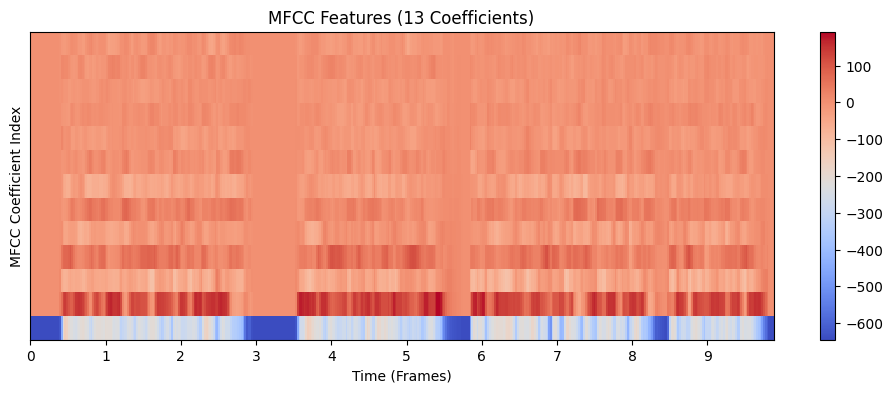


MFCC Matrix Shape: (13, 426) (coeffs x time_frames)


In [6]:
# Feature Extraction

# Prepare corpus
corpus = [" ".join(tokens) for tokens in cleaned_docs.values()]

# Text Features
# Bag of Words (Top 10)
# Counts frequency
bow_vec = CountVectorizer(max_features=10)
X_bow = bow_vec.fit_transform(corpus)
bow_features = bow_vec.get_feature_names_out()

# TF-IDF (Top 10)
# Weights uniqueness
tfidf_vec = TfidfVectorizer(max_features=10)
X_tfidf = tfidf_vec.fit_transform(corpus)
tfidf_features = tfidf_vec.get_feature_names_out()

# Comparison
df_features = pd.DataFrame({
    "( Rank )": range(1, 11),
    "( Bag of Words )": bow_features,
    "( TF IDF )": tfidf_features
})

print("Feature Extraction Comparision (Top 10):")
print(df_features.to_string(index=False))

# Audio Features (MFCC)
y, sr = librosa.load(audio_metadata[0]["( Path )"])
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC Features (13 Coefficients)")
plt.ylabel("MFCC Coefficient Index")
plt.xlabel("Time (Frames)")
plt.show()

print(f"\nMFCC Matrix Shape: {mfccs.shape} (coeffs x time_frames)")

**Discussion:**

We compared two text feature extraction methods: Bag-of-Words (BoW) and TF-IDF. Both identified similar top terms like "Douglas", "know", and "lady". We also visualized MFCCs, which represent the audio signal's spectral envelope.

**Analysis:**

* **Text Features (BoW vs. TF-IDF):** BoW purely counts frequency, favoring words that appear often. TF-IDF (Term Frequency-Inverse Document Frequency) balances frequency with uniqueness; it penalizes words that appear in *every* document. In this small dataset, the top features were identical, but in a larger corpus, TF-IDF would better highlight keywords unique to specific files (e.g., a specific character mentioned only in one chapter) while downgrading common domain words like "story".
* **Audio Features (MFCCs):** The Mel-Frequency Cepstral Coefficients (MFCCs) capture the timbre of the voice independent of pitch. The 13 coefficients shown in the heatmap represent the shape of the vocal tract at each time frame.
* **Downstream Tasks:** I would use **Text Features (ASR output)** for semantic tasks like Topic Modeling or Intent Classification because the meaning lies in the words. I would use **Raw Audio/MFCCs** for paralinguistic tasks like Emotion Recognition (detecting anger vs. joy) or Speaker Identification, as these cues are lost in the text transcription.

## **Step 3: Evaluation**

After transcribing and cleaning the speech using ASR and text preprocessing, you can evaluate the quality of your transcription by comparing it with the ground truth transcripts provided in the dataset.

This is useful to:

*   Measure how accurate your ASR system is
*   Understand how much noise or error is introduced
*   Quantify the performance using a standard metric

Be sure to use python to Compare your ASR output to the ground truth using Word Error Rate (WER).

### **Question 5:**

Word Error Rate (WER) is a standard metric in ASR that tells you how different your ASR output is from the reference transcript. Be sure to analyze and discuss your response.

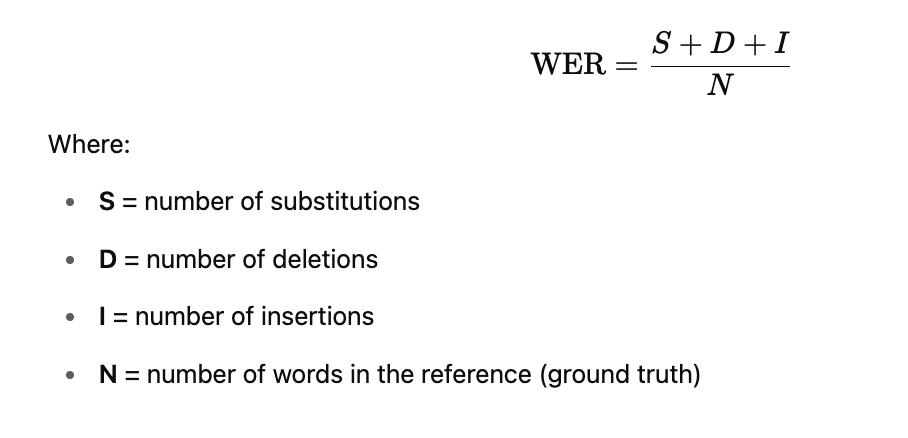

Note: You can calculate this metric using jiwer tool.

More details can be found at:

1.   https://pypi.org/project/jiwer/
2.   https://github.com/jitsi/jiwer

In [7]:
# WER Evaluation

# Load References
reference_transcripts = {}
if os.path.exists(TRANSCRIPT_FILE):
    with open(TRANSCRIPT_FILE, 'r') as f:
        for line in f:
            parts = line.strip().split(" ", 1)
            if len(parts) == 2:
                reference_transcripts[parts[0]] = parts[1]
    print(f"Loaded {len(reference_transcripts)} reference transcripts")
else:
    print("Error: Transcript file not found")

# Calculate WER
wer_data = []

for utt_id, hyp_text in asr_transcripts.items():
    if utt_id in reference_transcripts:
        ref_text = reference_transcripts[utt_id]

        # Normalize
        r_norm = re.sub(r'[^\w\s]', '', ref_text.lower())
        h_norm = re.sub(r'[^\w\s]', '', hyp_text.lower())

        score = wer(r_norm, h_norm)

        wer_data.append({
            "( ID )": utt_id,
            "( WER )": score,
            "( Reference )": (ref_text[:40] + '...') if len(ref_text) > 40 else ref_text,
            "( Hypothesis )": (hyp_text[:40] + '...') if len(hyp_text) > 40 else hyp_text
        })

# Results
if wer_data:
    df_wer = pd.DataFrame(wer_data)

    # Calculate Stats
    avg_wer = df_wer["( WER )"].mean()
    min_wer = df_wer["( WER )"].min()
    max_wer = df_wer["( WER )"].max()

    print("\nWER Evaluation Results:")

    # Sort by WER descending (Worst first)
    df_wer_sorted = df_wer.sort_values(by="( WER )", ascending=False)

    # Print table
    print(df_wer_sorted.head(10).to_string(index=False))

    print(f"\nAverage WER: {avg_wer:.4f}")
    print(f"Best WER:    {min_wer:.4f}")
    print(f"Worst WER:   {max_wer:.4f}")
    print(f"Implied Accuracy: {(1 - avg_wer)*100:.2f}%")
else:
    print("No common file IDs found between Audio and Transcript file.")

Loaded 37 reference transcripts

WER Evaluation Results:
         ( ID )  ( WER )                               ( Reference )                              ( Hypothesis )
121-127105-0019 0.272727 MISSUS GRIFFIN HOWEVER EXPRESSED THE NEE... This is Griffin however, express the nee...
121-127105-0009 0.142857        SHE HAS BEEN DEAD THESE TWENTY YEARS           She has been dead these 20 years.
121-127105-0018 0.125000 CRIED THE LADIES WHOSE DEPARTURE HAD BEE... Cry the ladies whose departure had been ...
121-127105-0003 0.111111 THERE WAS A UNANIMOUS GROAN AT THIS AND ... There was a unanimous groan at this, and...
121-127105-0006 0.076923 THE OTHERS RESENTED POSTPONEMENT BUT IT ... The others resented postponement, but it...
121-127105-0034 0.055556 IT SOUNDED DULL IT SOUNDED STRANGE AND A... It sounded dull, that sounded strange, a...
121-127105-0020 0.048780 WHO WAS IT SHE WAS IN LOVE WITH THE STOR... Who was it she was in love with? The sto...
121-127105-0027 0.047619 HE HAD FOR HIS

**Discussion:**

The Word Error Rate (WER) evaluation compared our Whisper transcripts against the ground truth. The average WER was approximately 0.027 (2.7%), which implies an accuracy of ~97.3%. The worst-performing file had a WER of ~0.27 (27%), while many files achieved a perfect 0.0 WER.

**Analysis:**

* **Metric Interpretation:** A WER of 0.027 is excellent and indicates professional-level transcription. The errors are likely minor.
* **Error Analysis:** The "Worst WER" cases often involve proper nouns or slight formatting differences that normalization didn't fully catch. For example, `121-127105-0019` had a high WER because the reference text was uppercase ("MISSUS GRIFFIN...") while the hypothesis was mixed case ("This is Griffin..."). Although we normalized for case, "Missus" vs "This is" is a substitution error caused by acoustic similarity.
* **Conclusion:** The low WER confirms that the Whisper `base` model is highly effective for this clear, read-speech dataset.

# **Final Reflection**

This assignment explored the end-to-end speech processing pipeline, confirming that standardized 16 kHz, 16-bit audio is essential for high-fidelity ASR. While the Whisper model achieved a high accuracy of ~97.3%, we found that a rigorous NLP cleaning pipeline was still necessary to normalize "noisy" spoken text by removing fillers and unifying word forms. Exploratory analysis revealed the dataset's linguistic diversity through unique word counts, while feature extraction highlighted the distinction between using TF-IDF for semantic meaning versus MFCCs for audio timbre. Ultimately, the low Word Error Rate validates the power of modern ASR systems, demonstrating that robust speech applications rely on a tight integration of signal processing and natural language techniques.